<a href="https://colab.research.google.com/github/Taweilo/House_Price_Prediction/blob/main/Code_USA_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) 2023 Tawei Lo

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# House Price Prediction

 <img src="https://www.bouzaien.com/post/house-pricing-prediction/featured.png" width="1100" height="450">

### Importing all the libraries

In [27]:
# Data wrangling
import pandas as pd # handle dataframe &
import numpy as np # deal with number and data

# Data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML data preparation
from sklearn.model_selection import train_test_split

# Statistical learning methods
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Ignore Warning
import warnings
warnings.simplefilter("ignore")

# set the random seed fixed for code reproduction
SEED = 12345


## 2. Data Understanding

### 2.1 Loading the data
House Price Data

In [4]:
# Provide the raw file URL
csv_url = 'https://raw.githubusercontent.com/Taweilo/House_Price_Prediction/main/housing_price_dataset.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)
# Display the first few rows of the DataFrame
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


### 2.2 Feature Description

In [5]:
#check dimension
df.shape

(50000, 6)

In [6]:
# check data type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [7]:
# how many data are missing of each variable
null_counts = df.isnull().sum()
null_counts

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [8]:
# Assuming your DataFrame is named df
categorical_columns = df.select_dtypes(include=['object'])

# Check the data type of each object column
for column in categorical_columns:
    print(f"Column '{column}' , unique: {categorical_columns[column].unique()}")

Column 'Neighborhood' , unique: ['Rural' 'Suburb' 'Urban']


In [9]:
# Descriptive analysis
df.describe().round(1)

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.0,50000.0,50000.0,50000.0,50000.0
mean,2006.4,3.5,2.0,1985.4,224827.3
std,575.5,1.1,0.8,20.7,76141.8
min,1000.0,2.0,1.0,1950.0,-36588.2
25%,1513.0,3.0,1.0,1967.0,169955.9
50%,2007.0,3.0,2.0,1985.0,225052.1
75%,2506.0,4.0,3.0,2003.0,279373.6
max,2999.0,5.0,3.0,2021.0,492195.3


In [10]:
corr = df.corr()
corr

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,0.003748,0.028418
YearBuilt,0.000482,0.003147,0.003748,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,-0.002288,1.000000


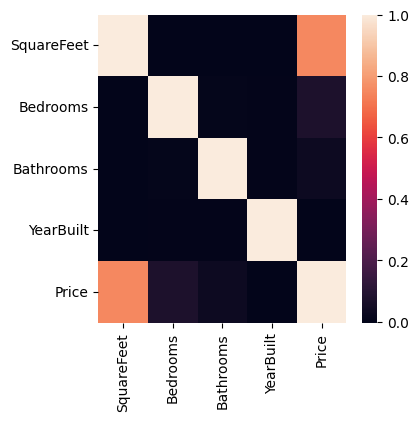

In [11]:
plt.figure(figsize=(4, 4))
_ = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

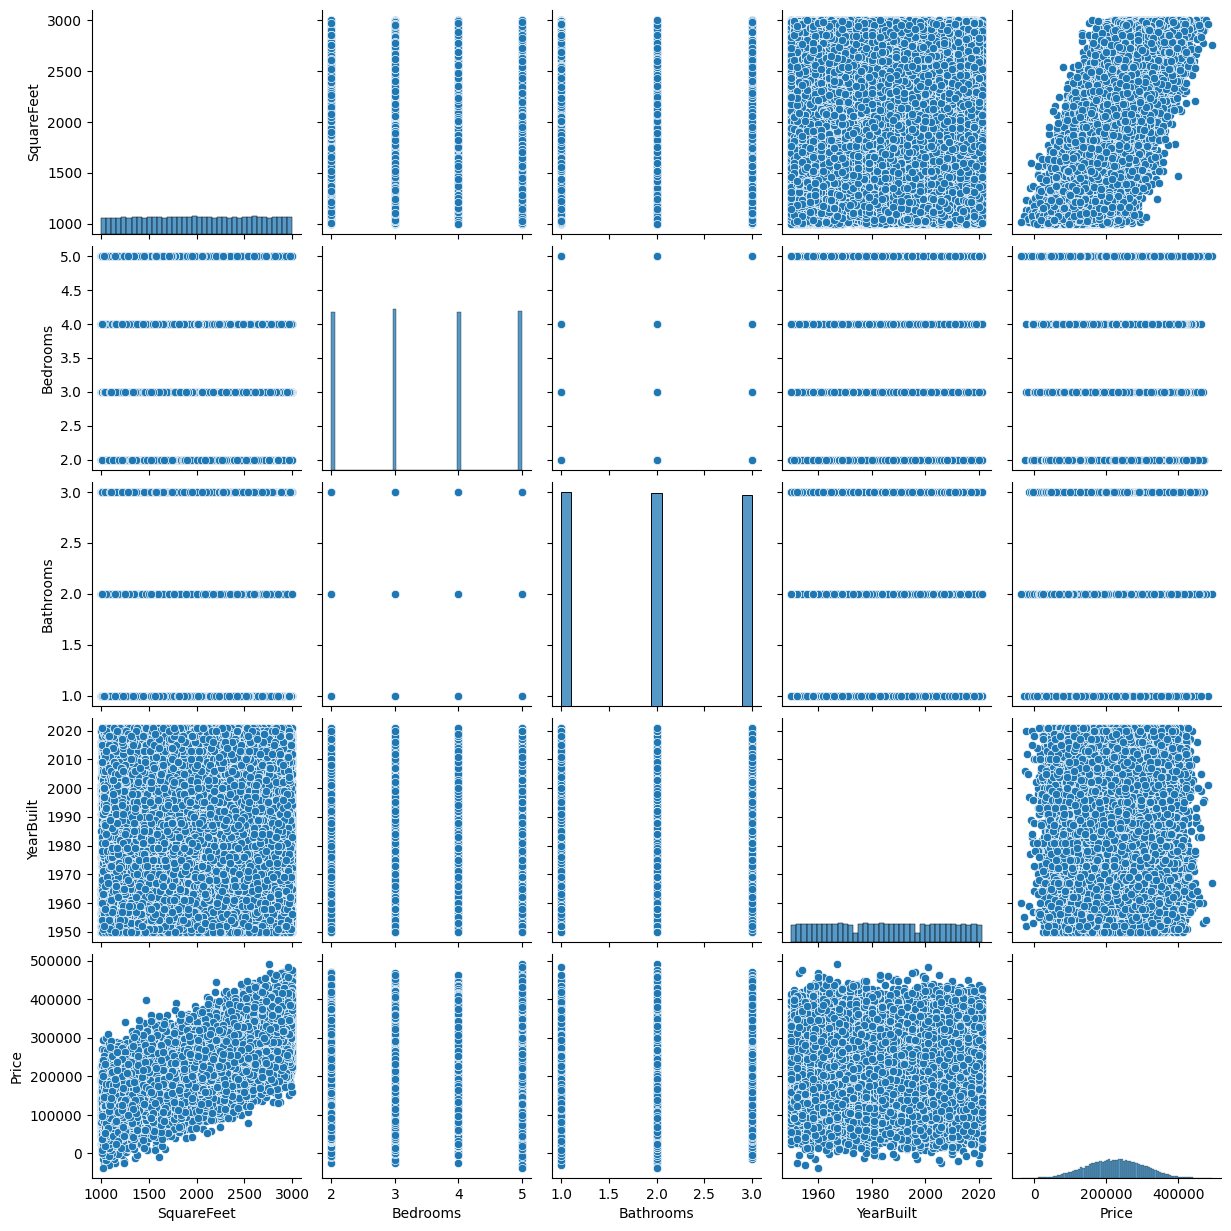

In [12]:
sns.pairplot(df[["SquareFeet","Bedrooms",	"Bathrooms","YearBuilt","Price"]], markers="o")
plt.show()

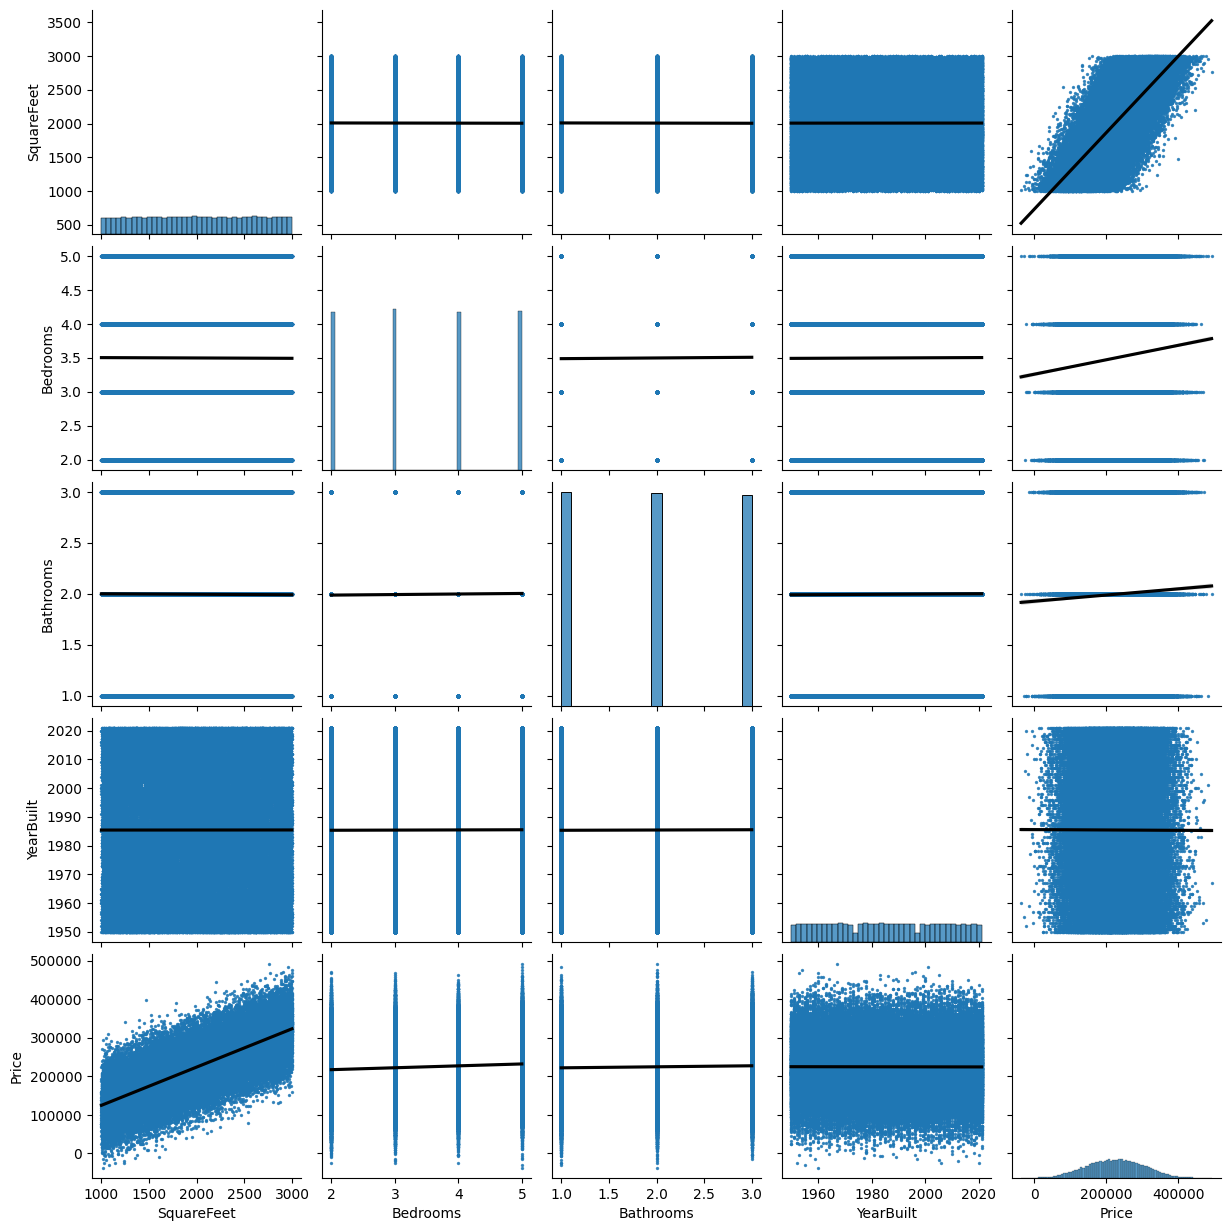

In [13]:
# fit a regression line to the scatter plots

sns.pairplot(df[["SquareFeet","Bedrooms",	"Bathrooms","YearBuilt","Price"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'}))

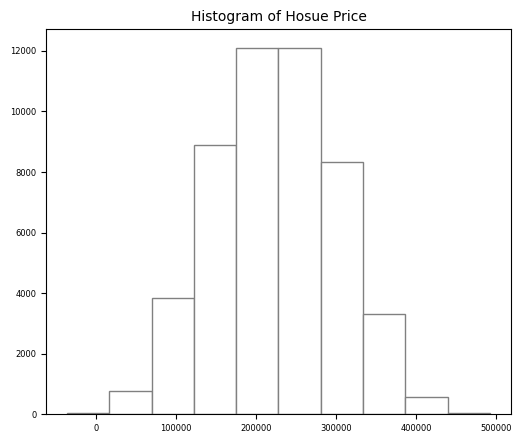

In [14]:
fig, ax1 = plt.subplots(figsize=(6, 5))
plt.hist(df['Price'], density=False, facecolor="white", edgecolor= 'grey')
plt.title('Histogram of Hosue Price', fontsize=10)
plt.tick_params(labelsize=6)
plt.show()

## 3. Data Preparation


### 3.1 Remove the null (data is clean no need of cleasing)

### 3.2 Define variables

In [15]:
# Create X, Y
y = df['Price'] # define Y
X = df.drop(['Price'], axis=1) # define X by dropping irrelevent features
X = pd.get_dummies(data=X, drop_first=True) # make dummy variable 3(=4-1) extra dummy variables(K-1)
X.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,0,0
1,2459,3,2,1980,0,0
2,1860,2,1,1970,1,0
3,2294,2,1,1996,0,1
4,2130,5,2,2001,1,0


### 3.3 Split the data for train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state = 42) # split data 70% for training

In [17]:
print(X_train.shape) # 3000 instances for taining
print(X_test.shape)  # 2000 instances for testing

(30000, 6)
(20000, 6)


## 4. Modeling
### 4.1 Linear Regression

In [18]:
linear_regressor = LinearRegression()
linear_regressor.fit(scale(X_train), y_train)
y_pred = linear_regressor.predict(scale(X_test))

In [19]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X.columns))

SquareFeet             57328.725083
Bedrooms                5780.526378
Bathrooms               2340.082533
YearBuilt                230.036229
Neighborhood_Suburb     -209.534798
Neighborhood_Urban       830.847032
dtype: float64


In [20]:
print('Intercept:', linear_regressor.intercept_)

Intercept: 224727.7624051325


## Formula:
### Price = 57328.725 * (Square Feet)+ 5780.526 * (Bedrooms) + 2340.083 * (Bathrooms) + 230.036 * (YearBuilt) + (-209.535) * (Neighborhood_Suburb)+ 30.847 * (Neighborhood_Urban) + 224727.762

### Reference group: Neighborhood_Rural
      

In [21]:
X_test[:1]

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Suburb,Neighborhood_Urban
33553,1894,5,1,1975,0,0


In [22]:
y_test[:1]

33553    170835.035713
Name: Price, dtype: float64

In [23]:
# Manually calculate
price = (X_test[:1] * linear_regressor.coef_)# Multiply each feature by its respective coefficient

# Sum the products of each feature and its coefficient
price_total = price.values.sum()+linear_regressor.intercept_
print(price_total)

109290897.33653101


In [24]:
# Use predict function
y_pred_1 = linear_regressor.predict(X_test[:1])
extracted_y_pred_1 = y_pred_1 .item()  # Extracting the value as a Python float

print(extracted_y_pred_1)

109290897.33653101


In [28]:
# Compare with y_test
mse = mean_squared_error(y_test[:1], y_pred[:1])
mse

2193848415.966841

## 5. Evaluation

In [34]:
mse_lr = round(mean_squared_error(y_test, y_pred),3)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE for Linear Regression is {mse_lr}")
print("R2 score:", r2)

Test MSE for Linear Regression is 2476941317.444
R2 score: 0.5695779857796195
